# Advanced Regression Assignment
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know:

- Which variables are significant in predicting the price of a house, and

- How well those variables describe the price of a house.

 
Also, determine the optimal value of lambda for ridge and lasso regression.

 

<b>Business Goal </b>
 

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

## 1. Data Understanding and Exploration

Let's first have a look at the dataset and understand the size, attribute names etc.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading the dataset
df = pd.read_csv('train.csv')

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.shape

(1460, 81)

In [5]:
# summary of the dataset: 1460 rows, 81 columns, few null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
pd.set_option("display.max_rows", 100)

In [7]:
pd.set_option("display.max_columns", 200)

### Data Cleaning

In [8]:
nullValues = round((df.isnull().sum()/len(df))*100, 2)
nullValues.loc[nullValues != 0]

LotFrontage     17.74
Alley           93.77
MasVnrType       0.55
MasVnrArea       0.55
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinType2     2.60
Electrical       0.07
FireplaceQu     47.26
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
PoolQC          99.52
Fence           80.75
MiscFeature     96.30
dtype: float64

In [9]:
# Dropping the variables with 40% and more null values.
df = df.drop(columns = ['MiscFeature','PoolQC', 'Alley', 'Fence', 'FireplaceQu'])

In [10]:
df.shape

(1460, 76)

In [11]:
#Id is not used to determine the SalesPrice of the house, so dropping it.
df = df.drop('Id', axis = 1)

In [12]:
nullValues = round((df.isnull().sum()/len(df))*100, 2)
nullValues.loc[nullValues != 0]

LotFrontage     17.74
MasVnrType       0.55
MasVnrArea       0.55
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinType2     2.60
Electrical       0.07
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
dtype: float64

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64


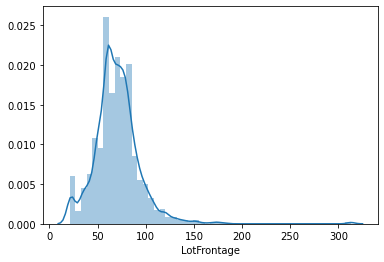

In [13]:
print(df.LotFrontage.describe())
sns.distplot(df['LotFrontage'])

In [14]:
# There seems to be few outlier in the data so filling the missing values by median
df['LotFrontage']= df.LotFrontage.fillna(df.LotFrontage.median())

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64


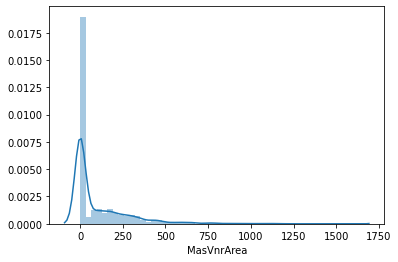

In [15]:
print(df.MasVnrArea.describe())
sns.distplot(df['MasVnrArea'])

In [16]:
# There seems to be few outlier in the data so filling the missing values by median
df['MasVnrArea']= df.MasVnrArea.fillna(df.MasVnrArea.median())

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64


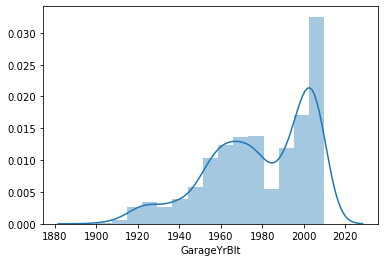

In [17]:
print(df.GarageYrBlt.describe())
sns.distplot(df['GarageYrBlt'])

In [18]:
# There seems to be no outlier in the data so filling the missing values by mean
df['GarageYrBlt']= df.GarageYrBlt.fillna(df.GarageYrBlt.mean())

In [19]:
nullValues = round((df.isnull().sum()/len(df))*100, 2)
nullValues.loc[nullValues != 0]

MasVnrType      0.55
BsmtQual        2.53
BsmtCond        2.53
BsmtExposure    2.60
BsmtFinType1    2.53
BsmtFinType2    2.60
Electrical      0.07
GarageType      5.55
GarageFinish    5.55
GarageQual      5.55
GarageCond      5.55
dtype: float64

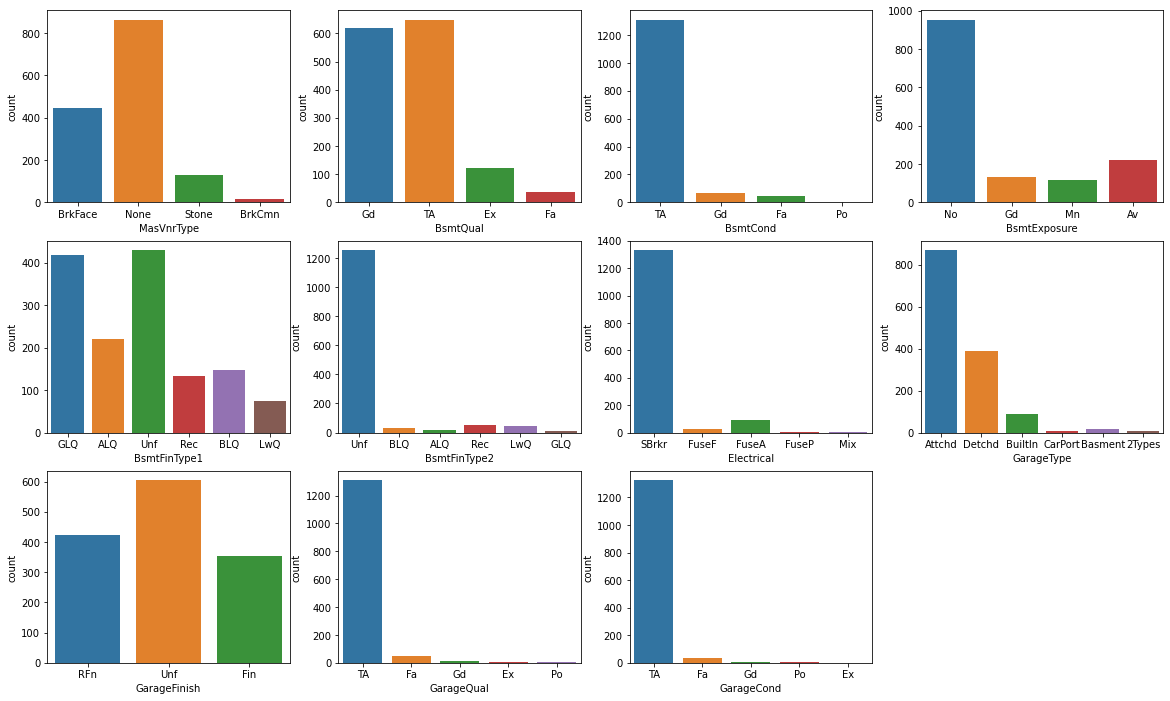

In [20]:
#Visualising the variables wih missing values

plt.figure(figsize=(20, 12))
plt.subplot(3,4,1)
sns.countplot(x = 'MasVnrType', data = df)
plt.subplot(3,4,2)
sns.countplot(x = 'BsmtQual',  data = df)
plt.subplot(3,4,3)
sns.countplot(x = 'BsmtCond', data = df)
plt.subplot(3,4,4)
sns.countplot(x = 'BsmtExposure', data = df)
plt.subplot(3,4,5)
sns.countplot(x = 'BsmtFinType1',  data = df)
plt.subplot(3,4,6)
sns.countplot(x = 'BsmtFinType2', data = df)
plt.subplot(3,4,7)
sns.countplot(x = "Electrical", data = df )
plt.subplot(3,4,8)
sns.countplot(x = 'GarageType', data = df)
plt.subplot(3,4,9)
sns.countplot(x = 'GarageFinish', data = df)
plt.subplot(3,4,10)
sns.countplot(x = 'GarageQual', data = df)
plt.subplot(3,4,11)
sns.countplot(x = 'GarageCond',  data = df)
plt.show()

In [21]:
#Replacing the null values of the categorical values.

df['MasVnrType'] =df['MasVnrType'].fillna("None", inplace = False)
df['BsmtQual'] =df['BsmtQual'].fillna("No Bsmt", inplace = False) 
df['BsmtCond']=df['BsmtCond'].fillna("No Bsmt", inplace = False) 
df['BsmtExposure']=df['BsmtExposure'].fillna("No Bsmt", inplace = False) 
df['BsmtFinType1']=df['BsmtFinType1'].fillna("No Bsmt", inplace = False) 
df['BsmtFinType2']=df['BsmtFinType2'].fillna("No Bsmt", inplace = False) 
df['Electrical']=df['Electrical'].fillna("SBrkr", inplace = False) 
df['GarageType']=df['GarageType'].fillna("No Garage", inplace = False) 
df['GarageFinish']=df['GarageFinish'].fillna("No Garage", inplace = False) 
df['GarageQual']=df['GarageQual'].fillna("No Garage", inplace = False) 
df['GarageCond']=df['GarageCond'].fillna("No Garage", inplace = False)

In [22]:
nullValues = round((df.isnull().sum()/len(df))*100, 2)
nullValues.loc[nullValues != 0]

Series([], dtype: float64)

- Dataset has no null values now.

### Data understanding

In [23]:
df.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object
HeatingQC         object
CentralAir        object


#### Converting numerical columns to categorical

In [24]:
df['OverallQual'] = df['OverallQual'].astype('object')
df['OverallCond'] = df['OverallCond'].astype('object')
df['MSSubClass'] = df['MSSubClass'].replace({20:'1-STORY 1946 & NEWER ALL STYLES',
                                             30:'1-STORY 1945 & OLDER',
                                             40:'1-STORY W/FINISHED ATTIC ALL AGES',
                                             45:'1-1/2 STORY - UNFINISHED ALL AGES',
                                             50:'1-1/2 STORY FINISHED ALL AGES',
                                             60:'2-STORY 1946 & NEWER',
                                             70:'2-STORY 1945 & OLDER',
                                             75:'2-1/2 STORY ALL AGES',
                                             80:'SPLIT OR MULTI-LEVEL',
                                             85:'SPLIT FOYER',
                                             90:'DUPLEX - ALL STYLES AND AGES',
                                             120:'1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
                                             150:'1-1/2 STORY PUD - ALL AGES',
                                             160:'2-STORY PUD - 1946 & NEWER',
                                             180:'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
                                             190:'2 FAMILY CONVERSION - ALL STYLES AND AGES'})

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   object 
 16  OverallCond    1460 non-null   object 
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

#### Visuializing categorical variables

In [26]:
df.select_dtypes(include=['object']).columns

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [27]:
len(df.select_dtypes(include=['object']).columns)

41

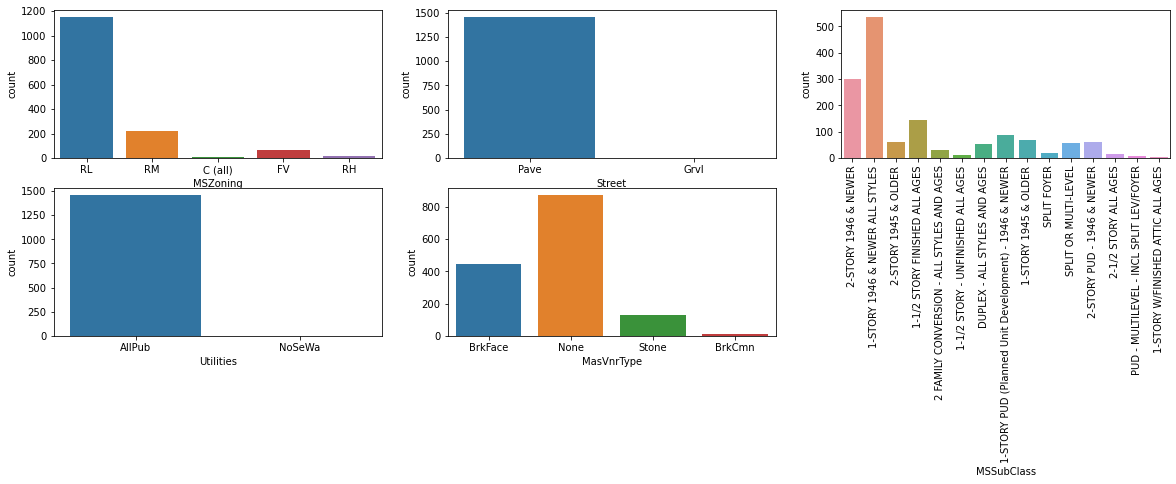

In [28]:
plt.figure(figsize=(20, 6))
plt.subplot(2,3,1)
sns.countplot(x = 'MSZoning', data = df)
plt.subplot(2,3,2)
sns.countplot(x = 'Street', data = df)
plt.subplot(2,3,3)
sns.countplot(x = 'MSSubClass',  data = df)
plt.xticks(rotation=90)
plt.subplot(2,3,4)
sns.countplot(x = 'Utilities', data = df)
plt.subplot(2,3,5)
sns.countplot(x = 'MasVnrType', data = df)
plt.show()

In [29]:
#Grouping the values that are significantly less in count to others reduces the level of the categorical values.
df.MSZoning = df.MSZoning.replace(['RH','C (all)'],'Others')

In [30]:
print(df.Utilities.value_counts())
print(df.Street.value_counts())

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
Pave    1454
Grvl       6
Name: Street, dtype: int64


In [31]:
# Dropping the column that is highly skewed towards one category.
df = df.drop(['Utilities', 'Street'], axis = 1)

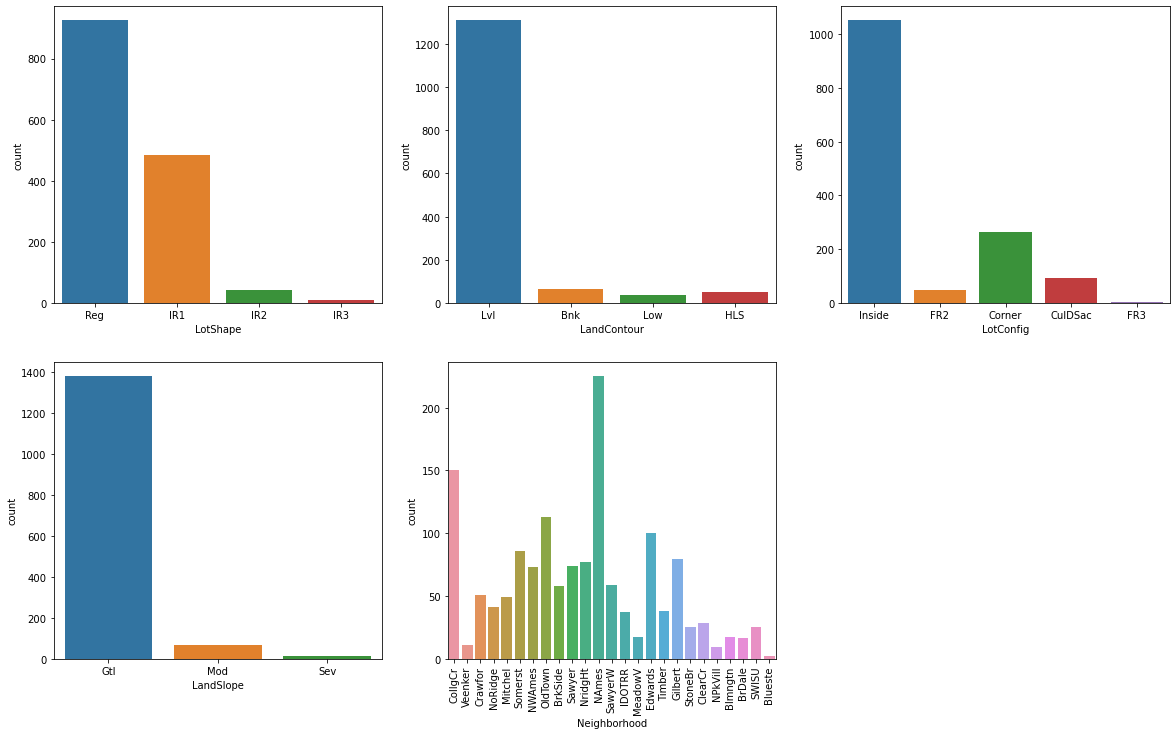

In [32]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.countplot(x = 'LotShape', data = df)
plt.subplot(2,3,2)
sns.countplot(x = 'LandContour', data = df)
plt.subplot(2,3,3)
sns.countplot(x = 'LotConfig',  data = df)
plt.subplot(2,3,4)
sns.countplot(x = 'LandSlope', data = df)
plt.subplot(2,3,5)
sns.countplot(x = 'Neighborhood', data = df)
plt.xticks(rotation=90)
plt.show()

In [33]:
#Grouping the values that are significantly less in count to others reduces the level of the categorical values.
df.LotShape = df.LotShape.replace(['IR2','IR3'],'Others')
df.LotConfig = df.LotConfig.replace(['FR2','FR3'],'Others')
df.LandContour = df.LandContour.replace(['Bnk','Low','HLS'],'Others')
df.LandSlope = df.LandSlope.replace(['Mod','Sev'], 'Others')

In [34]:
print(df.LandSlope.value_counts())
print(df.LandContour.value_counts())

Gtl       1382
Others      78
Name: LandSlope, dtype: int64
Lvl       1311
Others     149
Name: LandContour, dtype: int64


In [35]:
# Dropping the column that is highly skewed towards one category.
df = df.drop(['LandSlope', 'LandContour'], axis = 1)

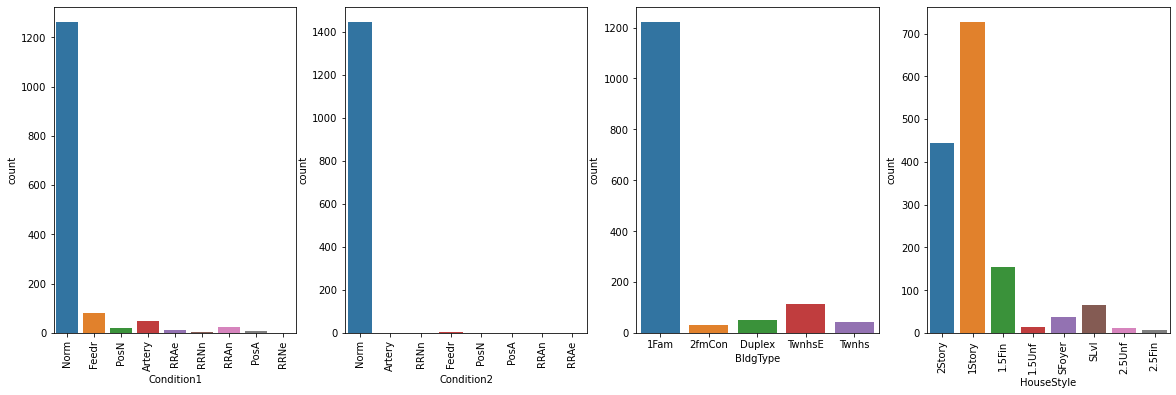

In [36]:
plt.figure(figsize=(20, 6))
plt.subplot(1,4,1)
sns.countplot(x = 'Condition1', data = df)
plt.xticks(rotation=90)
plt.subplot(1,4,2)
sns.countplot(x = 'Condition2', data = df)
plt.xticks(rotation=90)
plt.subplot(1,4,3)
sns.countplot(x = 'BldgType',  data = df)
plt.subplot(1,4,4)
sns.countplot(x = 'HouseStyle', data = df)
plt.xticks(rotation=90)
plt.show()

In [37]:
#Grouping the values that are significantly less in count to others reduces the level of the categorical values.
df.Condition1 = df.Condition1.replace(['Feedr','PosN','Atery','Artery','RRAe','RRNn','RRAn','PosA','RRNe'],'Others')
df.Condition2 = df.Condition2.replace(['Artery','RRNn','Feedr','PosN','PosA','RRAn','RRAe'],'Others')
df.HouseStyle = df.HouseStyle.replace(['SFoyer','1.5Unf','2.5Unf','2.5Fin'],'Others')

In [38]:
print(df.Condition2.value_counts())

Norm      1445
Others      15
Name: Condition2, dtype: int64


In [39]:
# Dropping the column that is highly skewed towards one category.
df = df.drop(['Condition2'], axis = 1)

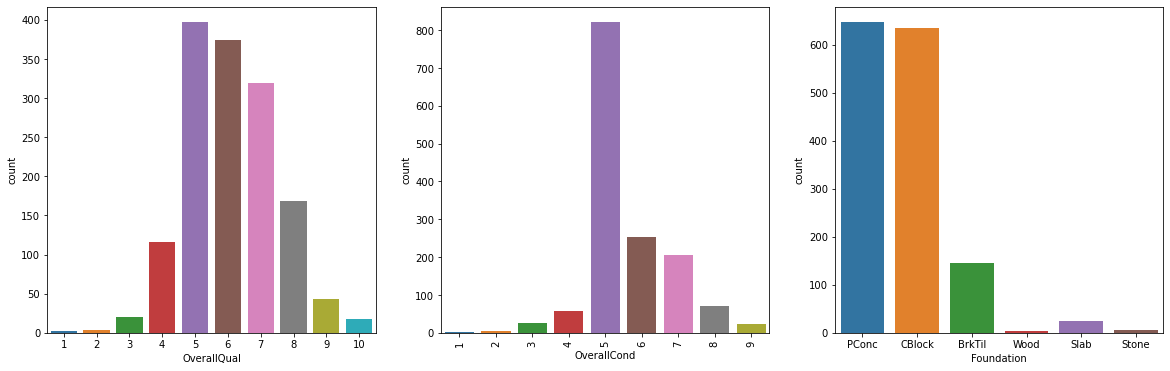

In [40]:
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
sns.countplot(x = 'OverallQual', data = df)
plt.subplot(1,3,2)
sns.countplot(x = 'OverallCond', data = df)
plt.xticks(rotation=90)
plt.subplot(1,3,3)
sns.countplot(x = 'Foundation',  data = df)
plt.show()

In [41]:
#Grouping the values that are significantly less in count to others reduces the level of the categorical values.
df.Foundation = df.Foundation.replace(['Slab','Stone','Wood'],'Others')
df.OverallQual = df.OverallQual.replace({ 10:'Very High', 9:'Very High',
                                         8:'High', 7:'High',
                                         6:'Average', 5:'Average',
                                         4:'Low', 3:'Low',
                                         2:'Very Poor', 1:'Very Poor'})
df.OverallCond= df.OverallCond.replace({9:'Good', 8:'Good', 7:'Good', 
                                                 6:'Average', 5:'Average', 4:'Average',
                                                 3:'Poor', 2:'Poor', 1:'Poor'})

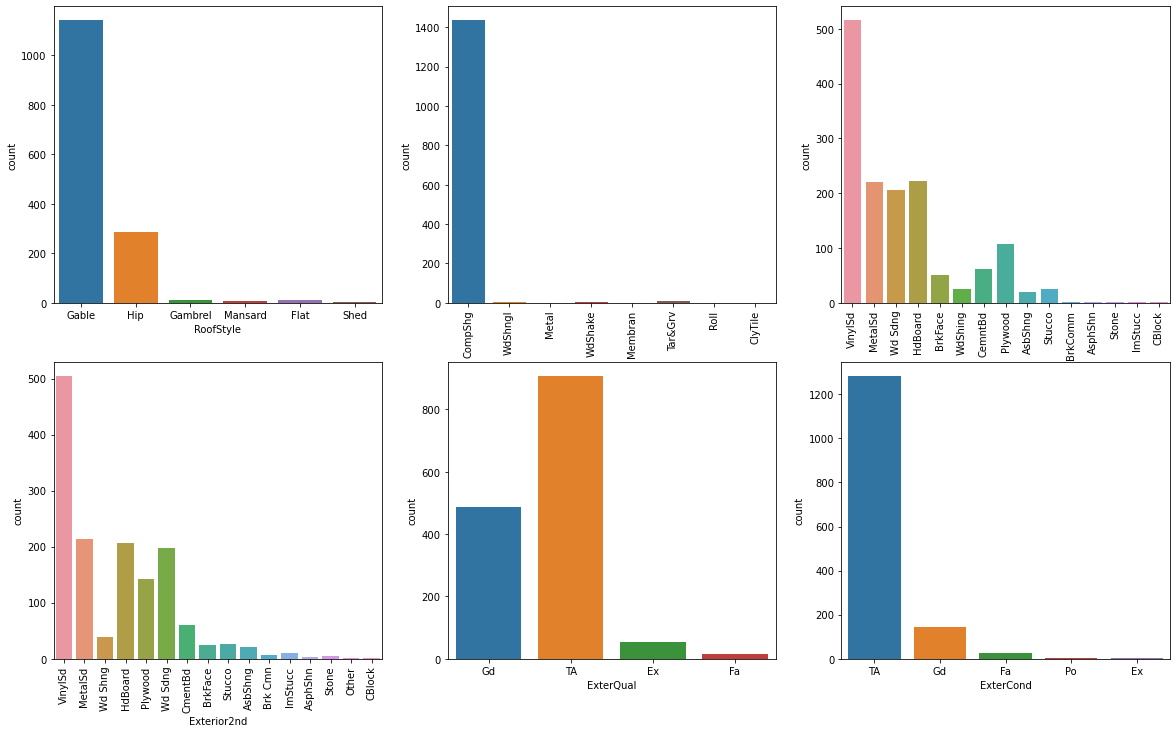

In [42]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.countplot(x = 'RoofStyle', data = df)
plt.subplot(2,3,2)
sns.countplot(x = 'RoofMatl', data = df)
plt.xticks(rotation=90)
plt.subplot(2,3,3)
sns.countplot(x = 'Exterior1st',  data = df)
plt.xticks(rotation=90)
plt.subplot(2,3,4)
sns.countplot(x = 'Exterior2nd', data = df)
plt.xticks(rotation=90)
plt.subplot(2,3,5)
sns.countplot(x = 'ExterQual', data = df)
plt.subplot(2,3,6)
sns.countplot(x = 'ExterCond', data = df)
plt.show()

In [43]:
#Grouping the values that are significantly less in count to others reduces the level of the categorical values.
df.RoofStyle = df.RoofStyle.replace(['Shed','Mansard','Gambrel','Flat'],'Others')
df.RoofMatl = df.RoofMatl.replace(['Metal','WdShake','WdShngl','Membran','Tar&Grv','Roll','ClyTile'],'Others')
df.Exterior1st = df.Exterior1st.replace(['AsphShn','ImStucc','CBlock','Stone','BrkComm','AsbShng','Stucco','WdShing'],'Others')
df.Exterior2nd = df.Exterior2nd.replace(['Other','AsphShn','ImStucc','CBlock','Stone','BrkComm','AsbShng','Stucco','BrkFace','Brk Cmn'],'Others')
df.ExterQual = df.ExterQual.replace(['Ex','Fa'],'Others')
df.ExterCond = df.ExterCond.replace(['Fa','Po','Ex'], 'Others')

In [44]:
print(df.RoofMatl.value_counts())

CompShg    1434
Others       26
Name: RoofMatl, dtype: int64


In [45]:
# Dropping the column that is highly skewed towards one category.
df = df.drop(['RoofMatl'], axis = 1)

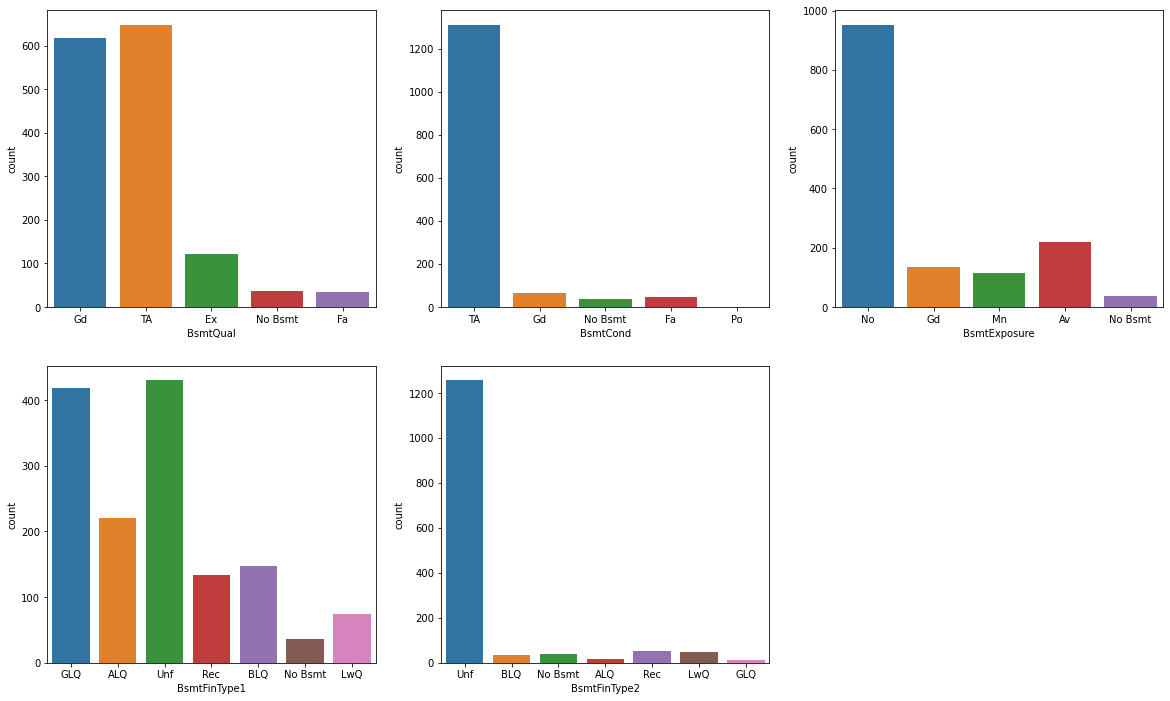

In [46]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.countplot(x = 'BsmtQual', data = df)
plt.subplot(2,3,2)
sns.countplot(x = 'BsmtCond', data = df)
plt.subplot(2,3,3)
sns.countplot(x = 'BsmtExposure',  data = df)
plt.subplot(2,3,4)
sns.countplot(x = 'BsmtFinType1', data = df)
plt.subplot(2,3,5)
sns.countplot(x = 'BsmtFinType2', data = df)
plt.show()

In [47]:
#Grouping the values that are significantly less in count to others reduces the level of the categorical values.
df.BsmtCond = df.BsmtCond.replace(['Gd','Fa','Po','No Bsmt'],'Others')
df.BsmtFinType2 = df.BsmtFinType2.replace(['BLQ','ALQ','Rec','LwQ','GLQ','No Bsmt'], 'Others')

In [48]:
print(df.BsmtFinType2.value_counts())
print(df.BsmtCond.value_counts())

Unf       1256
Others     204
Name: BsmtFinType2, dtype: int64
TA        1311
Others     149
Name: BsmtCond, dtype: int64


In [49]:
# Dropping the column that is highly skewed towards one category.
df = df.drop(['BsmtFinType2', 'BsmtCond'], axis = 1)

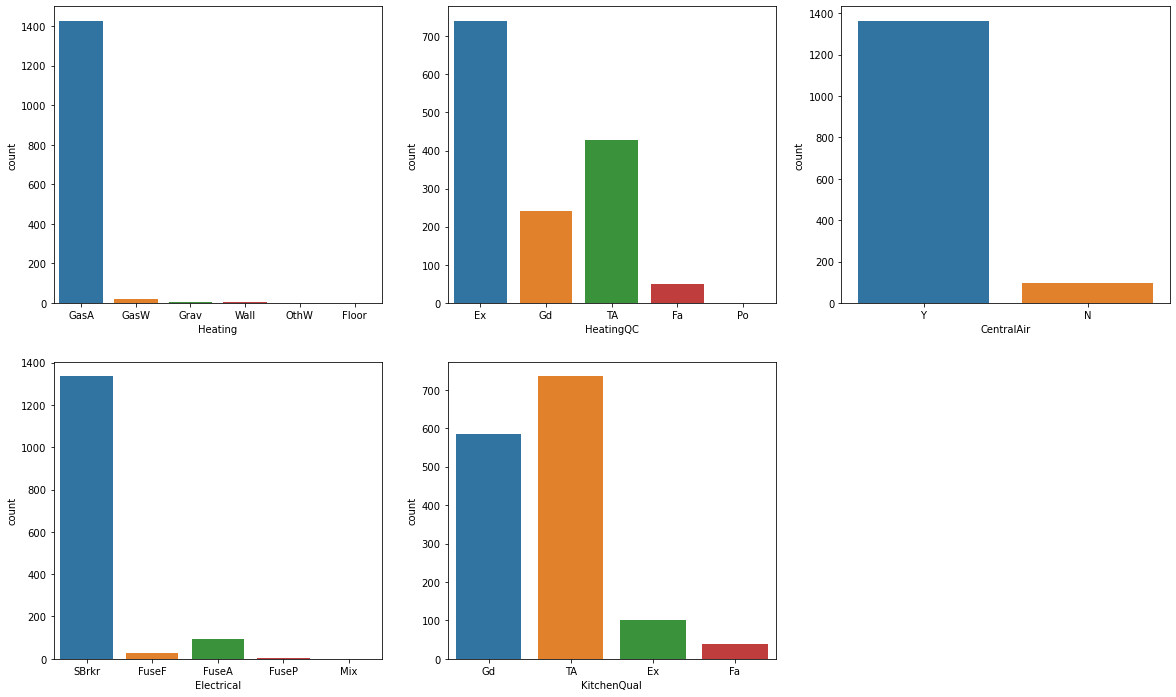

In [50]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.countplot(x = 'Heating', data = df)
plt.subplot(2,3,2)
sns.countplot(x = 'HeatingQC', data = df)
plt.subplot(2,3,3)
sns.countplot(x = 'CentralAir',  data = df)
plt.subplot(2,3,4)
sns.countplot(x = 'Electrical', data = df)
plt.subplot(2,3,5)
sns.countplot(x = 'KitchenQual', data = df)
plt.show()

In [51]:
#Grouping the values that are significantly less in count to others reduces the level of the categorical values.
df.Heating = df.Heating.replace(['GasW','Grav','Wall','OthW', 'Floor'],'Others')
df.Electrical = df.Electrical.replace(['FuseF','FuseA','FuseP','Mix'], 'Others')

In [52]:
print(df.Heating.value_counts())
print(df.CentralAir.value_counts())
print(df.Electrical.value_counts())

GasA      1428
Others      32
Name: Heating, dtype: int64
Y    1365
N      95
Name: CentralAir, dtype: int64
SBrkr     1335
Others     125
Name: Electrical, dtype: int64


In [53]:
# Dropping the column that is highly skewed towards one category.
df = df.drop(['Heating', 'CentralAir', 'Electrical'], axis = 1)

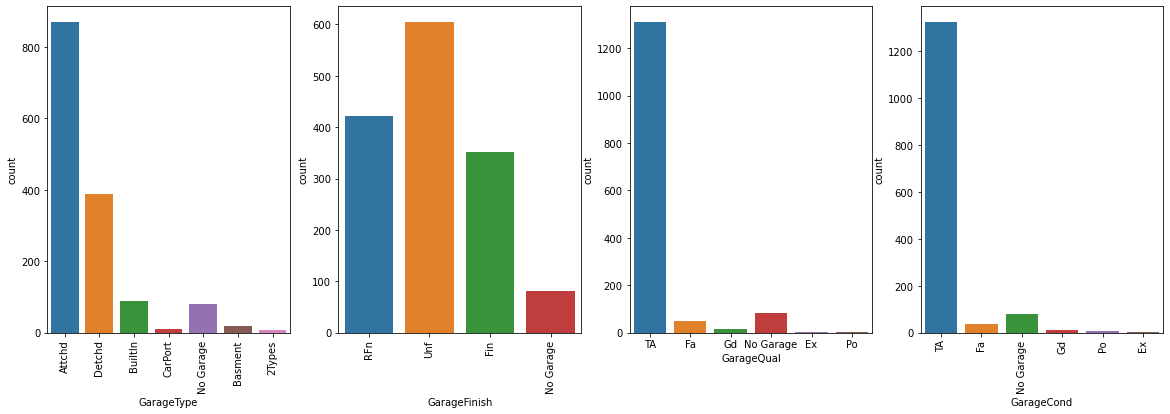

In [54]:
plt.figure(figsize=(20, 6))
plt.subplot(1,4,1)
sns.countplot(x = 'GarageType', data = df)
plt.xticks(rotation=90)
plt.subplot(1,4,2)
sns.countplot(x = 'GarageFinish', data = df)
plt.xticks(rotation=90)
plt.subplot(1,4,3)
sns.countplot(x = 'GarageQual',  data = df)
plt.subplot(1,4,4)
sns.countplot(x = 'GarageCond', data = df)
plt.xticks(rotation=90)
plt.show()

In [55]:
#Grouping the values that are significantly less in count to others reduces the level of the categorical values.
df.GarageType = df.GarageType.replace(['Basment','CarPort','2Types'],'Others')
df.GarageQual = df.GarageQual.replace(['Fa','Gd','Ex','Po','No Garage'],'Others')
df.GarageCond = df.GarageCond.replace(['Fa','Gd','Po','Ex','No Garage'],'Others')

In [56]:
print(df.GarageQual.value_counts())
print(df.GarageCond.value_counts())

TA        1311
Others     149
Name: GarageQual, dtype: int64
TA        1326
Others     134
Name: GarageCond, dtype: int64


In [57]:
# Dropping the column that is highly skewed towards one category.
df = df.drop(['GarageQual', 'GarageCond'], axis = 1)

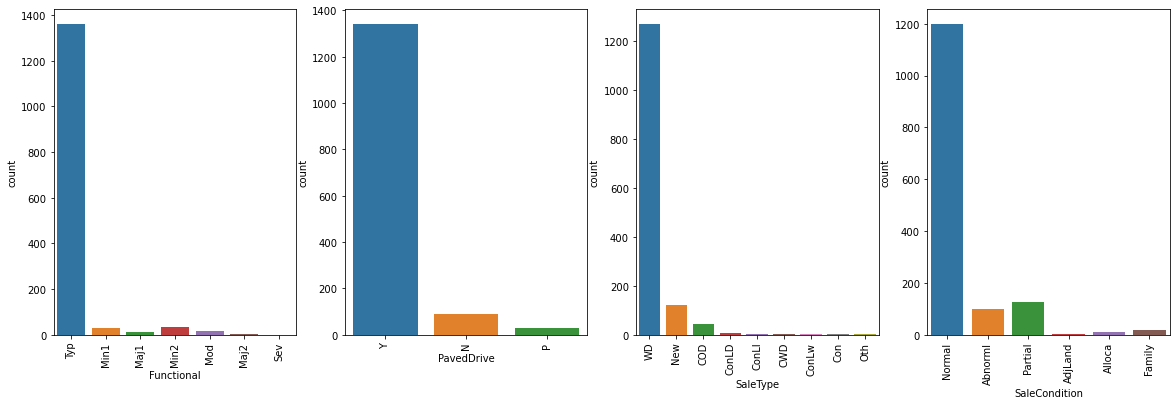

In [58]:
plt.figure(figsize=(20, 6))
plt.subplot(1,4,1)
sns.countplot(x = 'Functional', data = df)
plt.xticks(rotation=90)
plt.subplot(1,4,2)
sns.countplot(x = 'PavedDrive', data = df)
plt.xticks(rotation=90)
plt.subplot(1,4,3)
sns.countplot(x = 'SaleType',  data = df)
plt.xticks(rotation=90)
plt.subplot(1,4,4)
sns.countplot(x = 'SaleCondition', data = df)
plt.xticks(rotation=90)
plt.show()

In [59]:
#Grouping the values that are significantly less in count to others reduces the level of the categorical values.
df.SaleCondition = df.SaleCondition.replace(['Family','Alloca','AdjLand'],'Others')
df.SaleType = df.SaleType.replace(['COD','ConLD','ConLI','ConLw','CWD','Con','Oth'],'Others')
df.Functional = df.Functional.replace(['Min1', 'Min2','Maj1','Maj2','Mod','Sev',],'Others')
df.PavedDrive = df.PavedDrive.replace(['N','P'],'Others')

In [60]:
print(df.Functional.value_counts())
print(df.PavedDrive.value_counts())

Typ       1360
Others     100
Name: Functional, dtype: int64
Y         1340
Others     120
Name: PavedDrive, dtype: int64


In [61]:
# Dropping the column that is highly skewed towards one category.
df = df.drop(['Functional', 'PavedDrive'], axis = 1)

In [62]:
len(df.select_dtypes(include=['object']).columns)

26

#### Visualizing Numerical Variables

In [63]:
numericalCol = df.select_dtypes(include=['int64','float64']).columns
numericalCol

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [64]:
#Analyse Target variable
df.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

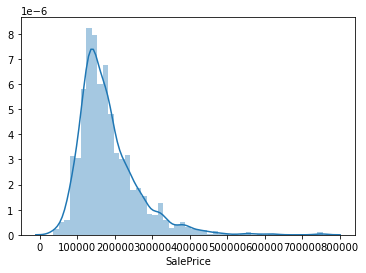

In [65]:
sns.distplot(df.SalePrice)

- Data is skewed, so transforming to form normal distribution

In [66]:
df.SalePrice=np.log(df.SalePrice)

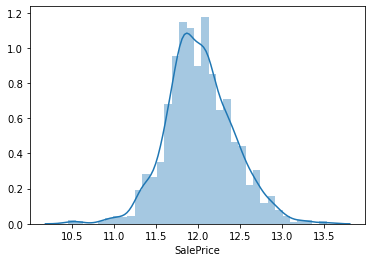

In [67]:
sns.distplot(df.SalePrice)

In [68]:
df.describe()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,69.863699,10516.828082,1971.267808,1984.865753,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,12.024051
std,22.027677,9981.264932,30.202904,20.645407,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,23.994583,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,0.399452
min,21.000000,1300.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,10.460242
25%,60.000000,7553.500000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1962.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,11.775097
50%,69.000000,9478.500000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1978.506164,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,12.001505
75%,79.000000,11601.500000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,12.273731
max,313.000000,215245.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,13.534473


Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
34


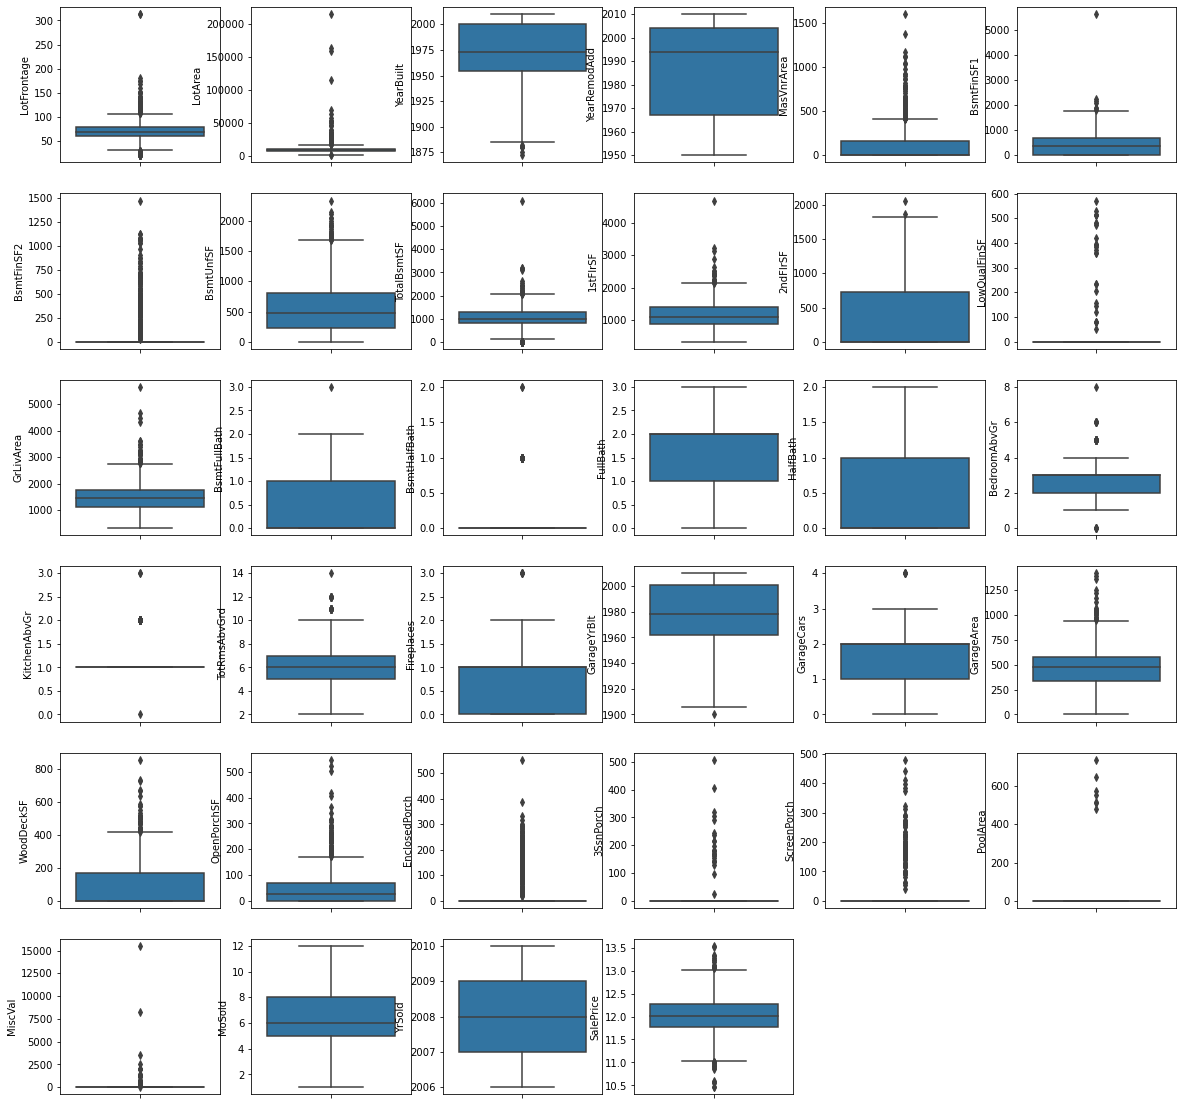

In [69]:
# Visualizing all the numerical columns.
print(numericalCol)
print(len(numericalCol))
plt.figure(figsize=(20,20))
for i in range(1,35):
    plt.subplot(6,6,i)
    sns.boxplot(y=df[numericalCol[i-1]])

In [70]:
#Combining columns which have similar data
df.TotalFullBath = df.BsmtFullBath +df.FullBath
df.TotalHalfBath = df.BsmtHalfBath +df.HalfBath
# Post the above step, we drop those cols which now become redundant
df=df.drop(['BsmtFullBath','BsmtHalfBath','FullBath','HalfBath'],axis=1)

In [71]:
#Getting the age of the houses
from datetime import datetime

df['CurrentYear'] = datetime.now().year
df.Age = df.CurrentYear - df.YearBuilt
df.drop(['CurrentYear', 'YearBuilt'], axis = 1, inplace = True)

In [72]:
df.drop(['YearRemodAdd','GarageYrBlt','YrSold'],axis=1,inplace=True) #no need of these while making a model

In [73]:
#Handling Outliers in numerical data

df=df.loc[df['LotArea']<50000]
df=df.loc[df['BsmtFinSF1']<2000]
df=df.loc[df['WoodDeckSF']<500]
df=df.loc[df['TotalBsmtSF']<3000]
df.loc[df['3SsnPorch']>0,['3SsnPorch']]=1
df.loc[df['ScreenPorch']>0,['ScreenPorch']]=1
df.loc[df['BsmtFinSF2']>0,['BsmtFinSF2']]=1
df.loc[df['EnclosedPorch']>0,['EnclosedPorch']]=1
df.loc[df['LowQualFinSF']>0,['LowQualFinSF']]=1

In [74]:
df.PoolArea.value_counts()

0      1425
648       1
576       1
519       1
512       1
Name: PoolArea, dtype: int64

In [75]:
df.MiscVal.value_counts()

0        1380
400        10
500         7
700         4
450         4
2000        4
600         4
1200        2
480         2
1150        1
800         1
15500       1
620         1
3500        1
560         1
2500        1
1300        1
1400        1
350         1
8300        1
54          1
Name: MiscVal, dtype: int64

In [76]:
numericalCol = df.select_dtypes(include=['int64','float64']).columns
numericalCol

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'SalePrice'],
      dtype='object')

In [77]:
len(numericalCol)

26

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'SalePrice'],
      dtype='object')
26


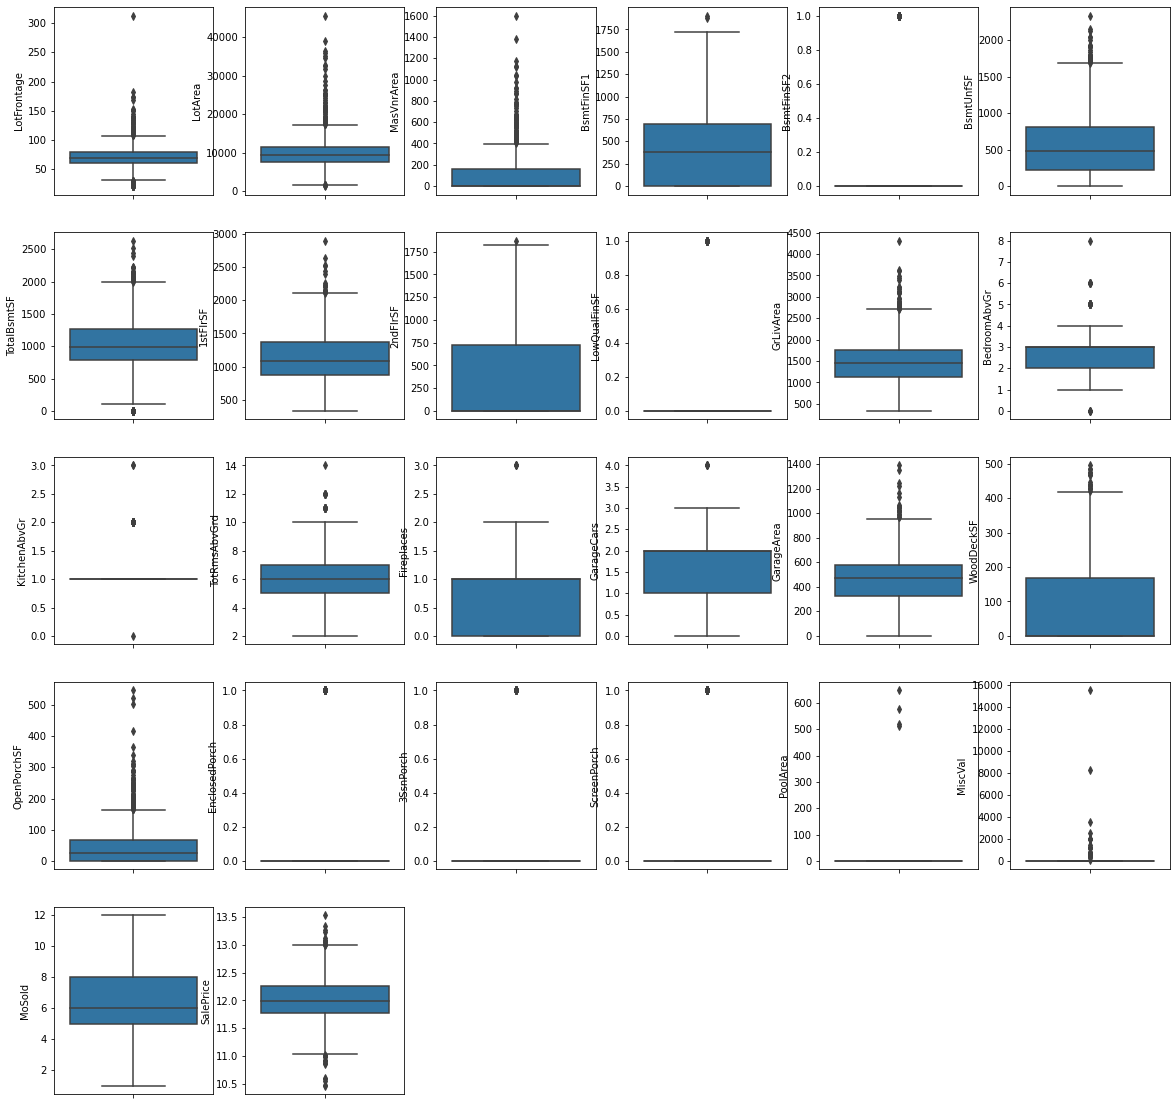

In [78]:
# Visualizing all the numerical columns.

print(numericalCol)
print(len(numericalCol))
plt.figure(figsize=(20,20))
for i in range(1,27):
    plt.subplot(5,6,i)
    sns.boxplot(y=df[numericalCol[i-1]])

In [79]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SaleType,SaleCondition,SalePrice
0,2-STORY 1946 & NEWER,RL,65.0,8450,Reg,Inside,CollgCr,Norm,1Fam,2Story,High,Average,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,No,GLQ,706,0,150,856,Ex,856,854,0,1710,3,1,Gd,8,0,Attchd,RFn,2,548,0,61,0,0,0,0,0,2,WD,Normal,12.247694
1,1-STORY 1946 & NEWER ALL STYLES,RL,80.0,9600,Reg,Others,Veenker,Others,1Fam,1Story,Average,Good,Gable,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,Gd,ALQ,978,0,284,1262,Ex,1262,0,0,1262,3,1,TA,6,1,Attchd,RFn,2,460,298,0,0,0,0,0,0,5,WD,Normal,12.109011
2,2-STORY 1946 & NEWER,RL,68.0,11250,IR1,Inside,CollgCr,Norm,1Fam,2Story,High,Average,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,Mn,GLQ,486,0,434,920,Ex,920,866,0,1786,3,1,Gd,6,1,Attchd,RFn,2,608,0,42,0,0,0,0,0,9,WD,Normal,12.317167
3,2-STORY 1945 & OLDER,RL,60.0,9550,IR1,Corner,Crawfor,Norm,1Fam,2Story,High,Average,Gable,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,No,ALQ,216,0,540,756,Gd,961,756,0,1717,3,1,Gd,7,1,Detchd,Unf,3,642,0,35,1,0,0,0,0,2,WD,Abnorml,11.849398
4,2-STORY 1946 & NEWER,RL,84.0,14260,IR1,Others,NoRidge,Norm,1Fam,2Story,High,Average,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,Av,GLQ,655,0,490,1145,Ex,1145,1053,0,2198,4,1,Gd,9,1,Attchd,RFn,3,836,192,84,0,0,0,0,0,12,WD,Normal,12.429216


In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1429 entries, 0 to 1458
Data columns (total 52 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1429 non-null   object 
 1   MSZoning       1429 non-null   object 
 2   LotFrontage    1429 non-null   float64
 3   LotArea        1429 non-null   int64  
 4   LotShape       1429 non-null   object 
 5   LotConfig      1429 non-null   object 
 6   Neighborhood   1429 non-null   object 
 7   Condition1     1429 non-null   object 
 8   BldgType       1429 non-null   object 
 9   HouseStyle     1429 non-null   object 
 10  OverallQual    1429 non-null   object 
 11  OverallCond    1429 non-null   object 
 12  RoofStyle      1429 non-null   object 
 13  Exterior1st    1429 non-null   object 
 14  Exterior2nd    1429 non-null   object 
 15  MasVnrType     1429 non-null   object 
 16  MasVnrArea     1429 non-null   float64
 17  ExterQual      1429 non-null   object 
 18  ExterCon

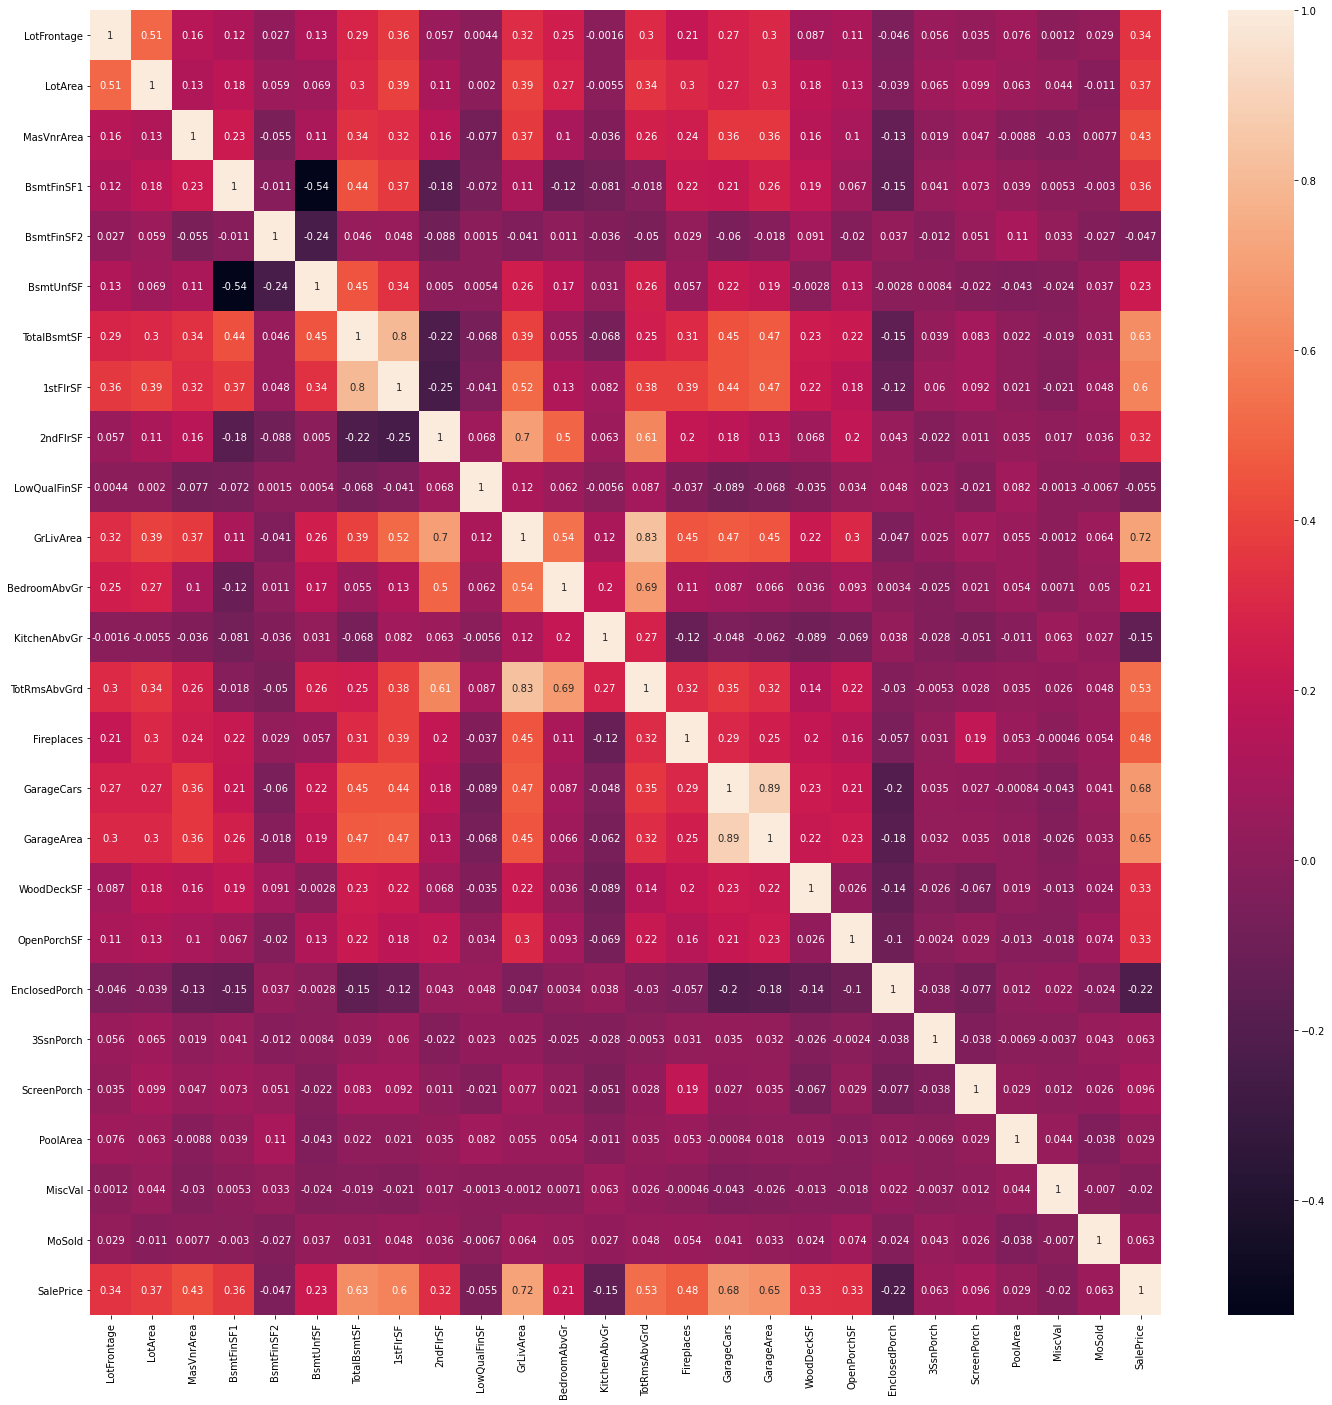

In [81]:
plt.figure(figsize=(24, 24))
sns.heatmap(df.corr(), annot = True)

## 2. Data Preparation

### Creating Dummy Variables

In [82]:
catVal = df.select_dtypes(include=['object'])
catVal.columns

Index(['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood',
       'Condition1', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1',
       'HeatingQC', 'KitchenQual', 'GarageType', 'GarageFinish', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [83]:
df_dummy = pd.get_dummies(catVal, drop_first = True)

In [84]:
df_dummy.head()

,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,MSSubClass_SPLIT FOYER,MSSubClass_SPLIT OR MULTI-LEVEL,MSZoning_Others,MSZoning_RL,MSZoning_RM,LotShape_Others,LotShape_Reg,LotConfig_CulDSac,LotConfig_Inside,LotConfig_Others,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Others,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_Others,HouseStyle_SLvl,OverallQual_High,OverallQual_Low,OverallQual_Very High,OverallQual_Very Poor,OverallCond_Good,OverallCond_Poor,RoofStyle_Hip,RoofStyle_Others,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Others,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Others,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Others,ExterQual_TA,ExterCond_Others,ExterCond_TA,Foundation_CBlock,Foundation_Others,Foundation_PConc,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Bsmt,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Bsmt,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Bsmt,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_BuiltIn,GarageType_Detchd,GarageType_No Garage,GarageType_Others,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,SaleType_Others,SaleType_WD,SaleCondition_Normal,SaleCondition_Others,SaleCondition_Partial
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0


In [85]:
df = pd.concat([df, df_dummy], axis = 1)
df = df.drop(catVal.columns, axis = 1)

In [86]:
df.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,MSSubClass_SPLIT FOYER,MSSubClass_SPLIT OR MULTI-LEVEL,MSZoning_Others,MSZoning_RL,MSZoning_RM,LotShape_Others,LotShape_Reg,LotConfig_CulDSac,LotConfig_Inside,LotConfig_Others,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Others,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_Others,HouseStyle_SLvl,OverallQual_High,OverallQual_Low,OverallQual_Very High,OverallQual_Very Poor,OverallCond_Good,OverallCond_Poor,RoofStyle_Hip,RoofStyle_Others,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Others,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Others,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Others,ExterQual_TA,ExterCond_Others,ExterCond_TA,Foundation_CBlock,Foundation_Others,Foundation_PConc,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Bsmt,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Bsmt,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Bsmt,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_BuiltIn,GarageType_Detchd,GarageType_No Garage,GarageType_Others,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,SaleType_Others,SaleType_WD,SaleCondition_Normal,SaleCondition_Others,SaleCondition_Partial
0,65.0,8450,196.0,706,0,150,856,856,854,0,1710,3,1,8,0,2,548,0,61,0,0,0,0,0,2,12.247694,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0
1,80.0,9600,0.0,978,0,284,1262,1262,0,0,1262,3,1,6,1,2,460,298,0,0,0,0,0,0,5,12.109011,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0
2,68.0,11250,162.0,486,0,434,920,920,866,0,1786,3,1,6,1,2,608,0,42,0,0,0,0,0,9,12.317167,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0
3,60.0,9550,0.0,216,0,540,756,961,756,0,1717,3,1,7,1,3,642,0,35,1,0,0,0,0,2,11.849398,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1

In [87]:
df.shape

(1429, 146)

### Train-Test split

In [88]:
X = df.drop('SalePrice', axis=1)
y = df['SalePrice']

In [89]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)
print('X_train Shape:', X_train.shape)
print('X_test Shape:', X_test.shape)
print('y_train Shape:', y_train.shape)
print('y_test Shape:', y_test.shape)

X_train Shape: (1000, 145)
X_test Shape: (429, 145)
y_train Shape: (1000,)
y_test Shape: (429,)


In [90]:
X_train.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,MSSubClass_SPLIT FOYER,MSSubClass_SPLIT OR MULTI-LEVEL,MSZoning_Others,MSZoning_RL,MSZoning_RM,LotShape_Others,LotShape_Reg,LotConfig_CulDSac,LotConfig_Inside,LotConfig_Others,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Others,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_Others,HouseStyle_SLvl,OverallQual_High,OverallQual_Low,OverallQual_Very High,OverallQual_Very Poor,OverallCond_Good,OverallCond_Poor,RoofStyle_Hip,RoofStyle_Others,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Others,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Others,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Others,ExterQual_TA,ExterCond_Others,ExterCond_TA,Foundation_CBlock,Foundation_Others,Foundation_PConc,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Bsmt,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Bsmt,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Bsmt,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_BuiltIn,GarageType_Detchd,GarageType_No Garage,GarageType_Others,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,SaleType_Others,SaleType_WD,SaleCondition_Normal,SaleCondition_Others,SaleCondition_Partial
127,55.0,4388,0.0,116,0,556,672,840,0,0,840,3,1,5,1,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0
691,104.0,21535,1170.0,1455,0,989,2444,2444,1872,0,4316,4,1,10,2,3,832,382,50,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
1315,85.0,11075,0.0,500,1,176,952,1092,1020,0,2112,4,1,9,2,2,576,280,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,1,0,0
149,69.0,6240,0.0,0,0,896,896,896,448,0,1344,3,1,7,0,1,240,200,114,0,0,0,0,0,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0

In [91]:
y_train.head()

127     11.373663
691     13.534473
1315    12.239991
149     11.652687
1194    11.970350
Name: SalePrice, dtype: float64

### Scaling

In [92]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [93]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
numericalCol = list(numericalCol)
numericalCol.remove('SalePrice')
X_train[numericalCol] = scaler.fit_transform(X_train[numericalCol])

X_train.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,MSSubClass_SPLIT FOYER,MSSubClass_SPLIT OR MULTI-LEVEL,MSZoning_Others,MSZoning_RL,MSZoning_RM,LotShape_Others,LotShape_Reg,LotConfig_CulDSac,LotConfig_Inside,LotConfig_Others,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Others,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_Others,HouseStyle_SLvl,OverallQual_High,OverallQual_Low,OverallQual_Very High,OverallQual_Very Poor,OverallCond_Good,OverallCond_Poor,RoofStyle_Hip,RoofStyle_Others,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Others,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Others,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Others,ExterQual_TA,ExterCond_Others,ExterCond_TA,Foundation_CBlock,Foundation_Others,Foundation_PConc,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Bsmt,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Bsmt,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Bsmt,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_BuiltIn,GarageType_Detchd,GarageType_No Garage,GarageType_Others,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,SaleType_Others,SaleType_WD,SaleCondition_Normal,SaleCondition_Others,SaleCondition_Partial
127,0.116438,0.069707,0.000000,0.060924,0.0,0.258244,0.255222,0.197348,0.000000,0.0,0.127072,0.375,0.5,0.250000,0.333333,0.00,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.454545,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0
691,0.284247,0.456772,0.731250,0.764181,0.0,0.459359,0.928219,0.822933,1.000000,0.0,1.000000,0.500,0.5,0.666667,0.666667,0.75,0.598561,0.786008,0.091408,0.0,0.0,0.0,0.0,0.0,0.000000,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
1315,0.219178,0.220655,0.000000,0.262605,1.0,0.081746,0.361565,0.295632,0.544872,0.0,0.446509,0.500,0.5,0.583333,0.666667,0.50,0.414388,0.576132,0.000000,0.0,0.0,0.0,0.0,0.0,0.454545,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,1,0,0


In [94]:
X_test[numericalCol] = scaler.transform(X_test[numericalCol])
X_test.head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,MSSubClass_DUPLEX - ALL STYLES AND AGES,MSSubClass_PUD - MULTILEVEL - INCL SPLIT LEV/FOYER,MSSubClass_SPLIT FOYER,MSSubClass_SPLIT OR MULTI-LEVEL,MSZoning_Others,MSZoning_RL,MSZoning_RM,LotShape_Others,LotShape_Reg,LotConfig_CulDSac,LotConfig_Inside,LotConfig_Others,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Others,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_Others,HouseStyle_SLvl,OverallQual_High,OverallQual_Low,OverallQual_Very High,OverallQual_Very Poor,OverallCond_Good,OverallCond_Poor,RoofStyle_Hip,RoofStyle_Others,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_MetalSd,Exterior1st_Others,Exterior1st_Plywood,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_HdBoard,Exterior2nd_MetalSd,Exterior2nd_Others,Exterior2nd_Plywood,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Others,ExterQual_TA,ExterCond_Others,ExterCond_TA,Foundation_CBlock,Foundation_Others,Foundation_PConc,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_No Bsmt,BsmtQual_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_No Bsmt,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_No Bsmt,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,GarageType_BuiltIn,GarageType_Detchd,GarageType_No Garage,GarageType_Others,GarageFinish_No Garage,GarageFinish_RFn,GarageFinish_Unf,SaleType_Others,SaleType_WD,SaleCondition_Normal,SaleCondition_Others,SaleCondition_Partial
58,0.154110,0.279503,0.644375,0.000000,0.0,0.654900,0.535511,0.425897,0.811432,0.0,0.655701,0.375,0.5,0.666667,0.333333,0.75,0.461151,0.395062,0.000000,1.0,0.0,0.0,0.0,0.0,0.818182,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1
1145,0.106164,0.111512,0.000000,0.000000,0.0,0.483976,0.395746,0.276131,0.285256,0.0,0.311904,0.375,0.5,0.500000,0.333333,0.25,0.161871,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.636364,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,0
378,0.229452,0.227856,0.218750,0.758929,0.0,0.190896,0.704899,0.593604,0.000000,0.0,0.382220,0.125,0.5,0.500000,0.333333,0.75,0.600000,0.232510,0.000000,0.0,0.0,0.0,0.0,0.0,0.454545,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
9

## 3. Model Building and Evaluation

### RFE

In [95]:
from sklearn.feature_selection import RFE

# Running RFE 
lm = LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm,25)             # running RFE
rfe = rfe.fit(X_train,y_train)

In [96]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('LotFrontage', True, 1),
 ('LotArea', False, 16),
 ('MasVnrArea', False, 114),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', False, 76),
 ('BsmtUnfSF', False, 28),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BedroomAbvGr', False, 81),
 ('KitchenAbvGr', True, 1),
 ('TotRmsAbvGrd', False, 22),
 ('Fireplaces', False, 3),
 ('GarageCars', True, 1),
 ('GarageArea', False, 2),
 ('WoodDeckSF', False, 10),
 ('OpenPorchSF', False, 21),
 ('EnclosedPorch', False, 108),
 ('3SsnPorch', False, 79),
 ('ScreenPorch', False, 20),
 ('PoolArea', False, 67),
 ('MiscVal', False, 94),
 ('MoSold', False, 111),
 ('MSSubClass_1-1/2 STORY FINISHED ALL AGES', False, 105),
 ('MSSubClass_1-STORY 1945 & OLDER', True, 1),
 ('MSSubClass_1-STORY 1946 & NEWER ALL STYLES', False, 50),
 ('MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
  False,
  51),
 ('MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES', False, 24),
 ('MSSu

In [97]:
cols = X_train.columns[rfe.support_]
cols

Index(['LotFrontage', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'KitchenAbvGr', 'GarageCars',
       'MSSubClass_1-STORY 1945 & OLDER', 'Neighborhood_BrDale',
       'Neighborhood_Crawfor', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV',
       'Neighborhood_OldTown', 'Neighborhood_StoneBr', 'Neighborhood_Veenker',
       'OverallQual_High', 'OverallQual_Low', 'OverallQual_Very High',
       'OverallQual_Very Poor', 'OverallCond_Poor', 'SaleType_Others',
       'SaleType_WD', 'SaleCondition_Normal'],
      dtype='object')

### Model Creation

In [98]:
# Create the X_test dataframe 
X_train_rfe = X_train[cols]

In [99]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [100]:
# Run the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()

In [101]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.889
Method:                 Least Squares   F-statistic:                     321.5
Date:                Mon, 22 Mar 2021   Prob (F-statistic):               0.00
Time:                        17:44:27   Log-Likelihood:                 638.64
No. Observations:                1000   AIC:                            -1225.
Df Residuals:                     974   BIC:                            -1098.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [102]:

# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe.drop('const', axis = 1)
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,GrLivArea,3551.84
3,1stFlrSF,1841.31
4,2ndFlrSF,668.95
2,TotalBsmtSF,25.24
23,SaleType_WD,20.59
7,KitchenAbvGr,19.04
8,GarageCars,11.18
24,SaleCondition_Normal,10.29
0,LotFrontage,7.69
5,LowQualFinSF,5.67


### Ridge Regression

In [103]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.8s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [104]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.009577,0.001351,0.003986,0.000889,0.0001,{'alpha': 0.0001},0.907293,0.919224,0.903118,0.901568,0.870778,0.900396,0.016050,19,0.936527,0.936623,0.938361,0.939199,0.944666,0.939075,0.002976
1,0.008384,0.001010,0.004986,0.000002,0.001,{'alpha': 0.001},0.907319,0.919272,0.903149,0.901474,0.870667,0.900376,0.016104,20,0.936524,0.936618,0.938358,0.939195,0.944665,0.939072,0.002977
2,0.007574,0.001356,0.003793,0.000984,0.01,{'alpha': 0.01},0.907494,0.919232,0.903364,0.900922,0.870093,0.900221,0.016324,21,0.936421,0.936483,0.938250,0.939092,0.944616,0.938972,0.003003
3,0.005785,0.000747,0.003190,0.000399,0.05,{'alpha': 0.05},0.908307,0.919224,0.904058,0.901004,0.869909,0.900501,0.016494,18,0.936193,0.936221,0.937945,0.938875,0.944480,0.938743,0.003047
4,0.005586,0.000489,0.002989,0.000631,0.1,{'alpha': 0.1},0.909197,0.919449,0.904735,0.901646,0.870250,0.901056,0.016538,16,0.936087,0.936062,0.937764,0.938732,0.944377,0.938604,0.003061


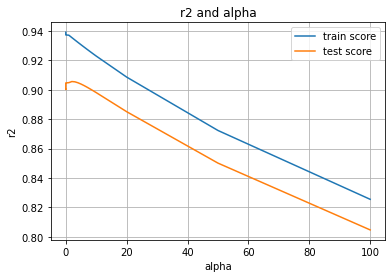

In [105]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('r2')
plt.title("r2 and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.grid()
plt.show()

In [106]:
#optimum alpha

alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X, y_train)
ridge.coef_

array([ 0.10732714,  0.22849562,  0.33621168,  0.32360567,  0.30007126,
       -0.01018996,  0.35303116, -0.12909877,  0.33765498, -0.1153736 ,
       -0.113122  ,  0.11213687, -0.1263537 , -0.0927353 , -0.11554038,
        0.07368553,  0.05843717,  0.18900485, -0.13774392,  0.34683374,
       -0.14498339, -0.21194222, -0.16060895, -0.16789275,  0.07865628])

In [107]:
ridge.score(X,y_train)

0.8782092680311424

In [108]:
ridge.score(X_test[X.columns],y_test)

0.8574828151551086

In [109]:
# Ridge model parameters
model_parameters = list(sorted(ridge.coef_))
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 11.52),
 ('LotFrontage', -0.212),
 ('BsmtFinSF1', -0.168),
 ('TotalBsmtSF', -0.161),
 ('1stFlrSF', -0.145),
 ('2ndFlrSF', -0.138),
 ('LowQualFinSF', -0.129),
 ('GrLivArea', -0.126),
 ('KitchenAbvGr', -0.116),
 ('GarageCars', -0.115),
 ('MSSubClass_1-STORY 1945 & OLDER', -0.113),
 ('Neighborhood_BrDale', -0.093),
 ('Neighborhood_Crawfor', -0.01),
 ('Neighborhood_IDOTRR', 0.058),
 ('Neighborhood_MeadowV', 0.074),
 ('Neighborhood_OldTown', 0.079),
 ('Neighborhood_StoneBr', 0.107),
 ('Neighborhood_Veenker', 0.112),
 ('OverallQual_High', 0.189),
 ('OverallQual_Low', 0.228),
 ('OverallQual_Very High', 0.3),
 ('OverallQual_Very Poor', 0.324),
 ('OverallCond_Poor', 0.336),
 ('SaleType_Others', 0.338),
 ('SaleType_WD', 0.347),
 ('SaleCondition_Normal', 0.353)]

### Lasso Regression

In [110]:
params = {'alpha': [0.0001,0.0002, 0.0003, 0.0004, 0.0005,0.01]}
lasso = Lasso()
# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    1.0s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [111]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.037100,0.007232,0.004588,0.001621,0.0001,{'alpha': 0.0001},-0.085244,-0.079153,-0.080504,-0.083352,-0.094932,-0.084637,0.005571,5,-0.069849,-0.071108,-0.072224,-0.070272,-0.068408,-0.070372,0.001274
1,0.039494,0.009197,0.004987,0.001410,0.0002,{'alpha': 0.0002},-0.083771,-0.079500,-0.080805,-0.083571,-0.093567,-0.084243,0.004938,2,-0.070916,-0.072350,-0.073485,-0.071517,-0.069834,-0.071621,0.001242
2,0.026330,0.006868,0.003989,0.001262,0.0003,{'alpha': 0.0003},-0.082842,-0.080018,-0.081012,-0.083677,-0.093225,-0.084155,0.004716,1,-0.072123,-0.073594,-0.074425,-0.072621,-0.071066,-0.072766,0.001163
3,0.024333,0.007373,0.004589,0.001352,0.0004,{'alpha': 0.0004},-0.082362,-0.081068,-0.081158,-0.084093,-0.093077,-0.084352,0.004498,3,-0.073234,-0.074623,-0.075221,-0.073602,-0.072116,-0.073759,0.001085
4,0.021143,0.004434,0.005187,0.000746,0.0005,{'alpha': 0.0005},-0.082085,-0.082000,-0.080976,-0.084377,-0.093023,-0.084492,0.004408,4,-0.074171,-0.075391,-0.075816,-0.074472,-0.072898,-0.074550,0.001019


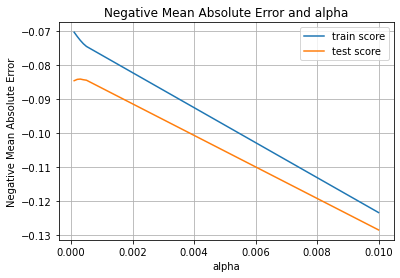

In [112]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.grid()
plt.show()

In [113]:
#optimum alpha

alpha = 0.001
lasso = Lasso(alpha=alpha)      
lasso.fit(X, y_train)

Lasso(alpha=0.001)

In [114]:
lasso.coef_

array([ 0.        ,  0.22279914,  0.39533255,  0.        ,  0.04618068,
       -0.01032787,  1.0626835 , -0.19165313,  0.36271533, -0.09177299,
       -0.11557498,  0.10515688, -0.12798121, -0.07325258, -0.11912818,
        0.03669655,  0.        ,  0.16874483, -0.12027867,  0.35518671,
       -0.1545819 , -0.25847007, -0.17608158, -0.17385367,  0.08361967])

In [115]:
lasso.score(X,y_train)

0.8852570157067546

In [116]:
lasso.score(X_test[X.columns],y_test)

0.8583181885968101

In [117]:
# lasso model parameters
model_parameters = list(sorted(lasso.coef_))
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
var_coeff = list((zip(cols, model_parameters)))
var_coeff

[('constant', 11.487),
 ('LotFrontage', -0.258),
 ('BsmtFinSF1', -0.192),
 ('TotalBsmtSF', -0.176),
 ('1stFlrSF', -0.174),
 ('2ndFlrSF', -0.155),
 ('LowQualFinSF', -0.128),
 ('GrLivArea', -0.12),
 ('KitchenAbvGr', -0.119),
 ('GarageCars', -0.116),
 ('MSSubClass_1-STORY 1945 & OLDER', -0.092),
 ('Neighborhood_BrDale', -0.073),
 ('Neighborhood_Crawfor', -0.01),
 ('Neighborhood_IDOTRR', 0.0),
 ('Neighborhood_MeadowV', 0.0),
 ('Neighborhood_OldTown', 0.0),
 ('Neighborhood_StoneBr', 0.037),
 ('Neighborhood_Veenker', 0.046),
 ('OverallQual_High', 0.084),
 ('OverallQual_Low', 0.105),
 ('OverallQual_Very High', 0.169),
 ('OverallQual_Very Poor', 0.223),
 ('OverallCond_Poor', 0.355),
 ('SaleType_Others', 0.363),
 ('SaleType_WD', 0.395),
 ('SaleCondition_Normal', 1.063)]

In [118]:
#Features along with their coefficients
var_coeff = [x for x in var_coeff if abs(x[-1] != 0)]
var_coeff

[('constant', 11.487),
 ('LotFrontage', -0.258),
 ('BsmtFinSF1', -0.192),
 ('TotalBsmtSF', -0.176),
 ('1stFlrSF', -0.174),
 ('2ndFlrSF', -0.155),
 ('LowQualFinSF', -0.128),
 ('GrLivArea', -0.12),
 ('KitchenAbvGr', -0.119),
 ('GarageCars', -0.116),
 ('MSSubClass_1-STORY 1945 & OLDER', -0.092),
 ('Neighborhood_BrDale', -0.073),
 ('Neighborhood_Crawfor', -0.01),
 ('Neighborhood_StoneBr', 0.037),
 ('Neighborhood_Veenker', 0.046),
 ('OverallQual_High', 0.084),
 ('OverallQual_Low', 0.105),
 ('OverallQual_Very High', 0.169),
 ('OverallQual_Very Poor', 0.223),
 ('OverallCond_Poor', 0.355),
 ('SaleType_Others', 0.363),
 ('SaleType_WD', 0.395),
 ('SaleCondition_Normal', 1.063)]

In [119]:
len(var_coeff)

23

### Evaluating Error Distribution

Error distribution in train dataset


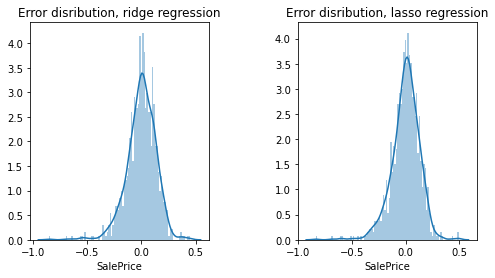

In [120]:
y_pred_ridge_train = ridge.predict(X)
y_pred_lasso_train = lasso.predict(X)

print('Error distribution in train dataset')
plt.figure(figsize=(8,4))
plt.subplot(1, 2, 1)
sns.distplot((y_train - y_pred_ridge_train), bins = 100)
plt.title('Error disribution, ridge regression')

plt.subplot(1, 2, 2)
sns.distplot((y_train - y_pred_lasso_train), bins = 100)
plt.title('Error disribution, lasso regression')

plt.subplots_adjust(wspace = .5)

Error distribution in test dataset


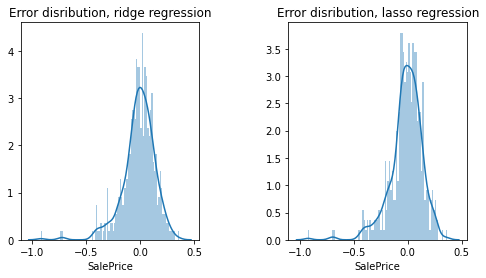

In [121]:
y_pred_ridge_test = ridge.predict(X_test[X.columns])
y_pred_lasso_test = lasso.predict(X_test[X.columns])

print('Error distribution in test dataset')
plt.figure(figsize=(8,4))
plt.subplot(1, 2, 1)
sns.distplot((y_test - y_pred_ridge_test), bins = 100)
plt.title('Error disribution, ridge regression')

plt.subplot(1, 2, 2)
sns.distplot((y_test - y_pred_lasso_test), bins = 100)
plt.title('Error disribution, lasso regression')

plt.subplots_adjust(wspace = .5)

## Conclusion

### Ridge regression:

- Optimum alpha value : 10 
- R2 score for train data : 87.82%
- R2 score for test data : 85.74%
- Top 5 most significant variables in Ridge are: 
    - ('LotFrontage', -0.212)
    - ('BsmtFinSF1', -0.168)
    - ('TotalBsmtSF', -0.161)
    - ('1stFlrSF', -0.145)
    - ('2ndFlrSF', -0.138)

### Lasso regression:

- Optimum alpha value : 0.001 
- R2 score for train data : 88.52%
- R2 score for test data : 85.83%
- Top 5 most significant variables in Ridge are: 
    - ('LotFrontage', -0.258)
    - ('BsmtFinSF1', -0.192)
    - ('TotalBsmtSF', -0.176)
    - ('1stFlrSF', -0.174)
    - ('2ndFlrSF', -0.155)

##### Between Ridge and Lasso, we can go by Lasso regression because:
- R2 for both train and test data is more.
- It helps in feature elimination.

### Doubling the alpha value in both the models

In [122]:
alpha = 40 
ridge = Ridge(alpha=alpha)
ridge.fit(X, y_train)
y_pred_ridge_train = ridge.predict(X)
y_pred_ridge_test = ridge.predict(X_test[X.columns])
ridgecoef= pd.Series(ridge.coef_,index= X.columns)
ridge_var_selected= sum(ridgecoef != 0)
print('Ridge has selected {} varibales'.format(ridge_var_selected))

#best variables predicing housing prices as per ridge Regression
model_parameters = list(sorted(ridge.coef_))
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

Ridge has selected 25 varibales


[('constant', 11.609),
 ('LotFrontage', -0.15),
 ('BsmtFinSF1', -0.135),
 ('TotalBsmtSF', -0.116),
 ('1stFlrSF', -0.113),
 ('2ndFlrSF', -0.096),
 ('LowQualFinSF', -0.094),
 ('GrLivArea', -0.091),
 ('KitchenAbvGr', -0.068),
 ('GarageCars', -0.059),
 ('MSSubClass_1-STORY 1945 & OLDER', -0.052),
 ('Neighborhood_BrDale', -0.051),
 ('Neighborhood_Crawfor', -0.01),
 ('Neighborhood_IDOTRR', 0.022),
 ('Neighborhood_MeadowV', 0.039),
 ('Neighborhood_OldTown', 0.047),
 ('Neighborhood_StoneBr', 0.073),
 ('Neighborhood_Veenker', 0.073),
 ('OverallQual_High', 0.197),
 ('OverallQual_Low', 0.201),
 ('OverallQual_Very High', 0.216),
 ('OverallQual_Very Poor', 0.23),
 ('OverallCond_Poor', 0.242),
 ('SaleType_Others', 0.243),
 ('SaleType_WD', 0.268),
 ('SaleCondition_Normal', 0.278)]

In [123]:
print('r2_score for ridge:')
print('Train dataset:', round(r2_score(y_train, y_pred_ridge_train), 4))
print('Test dataset:', round(r2_score(y_test, y_pred_ridge_test), 4))

r2_score for ridge:
Train dataset: 0.8132
Test dataset: 0.8131


In [124]:
alpha = 0.002
lasso = Lasso(alpha=alpha)
lasso.fit(X, y_train) 

y_pred_lasso_train = lasso.predict(X)
y_pred_lasso_test = lasso.predict(X_test[X.columns])
lassocoef= pd.Series(lasso.coef_,index= X.columns)
lasso_var_selected= sum(lassocoef != 0)
print('Lasso has selected {} varibales'.format(lasso_var_selected))

#best variables predicing housing prices as per lasso Regression
model_parameters = list(sorted(lasso.coef_))
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

Lasso has selected 18 varibales


[('constant', 11.412),
 ('LotFrontage', -0.257),
 ('BsmtFinSF1', -0.129),
 ('TotalBsmtSF', -0.128),
 ('1stFlrSF', -0.123),
 ('2ndFlrSF', -0.11),
 ('LowQualFinSF', -0.095),
 ('GrLivArea', -0.087),
 ('KitchenAbvGr', -0.082),
 ('GarageCars', -0.028),
 ('MSSubClass_1-STORY 1945 & OLDER', 0.0),
 ('Neighborhood_BrDale', 0.0),
 ('Neighborhood_Crawfor', -0.0),
 ('Neighborhood_IDOTRR', -0.0),
 ('Neighborhood_MeadowV', 0.0),
 ('Neighborhood_OldTown', 0.0),
 ('Neighborhood_StoneBr', -0.0),
 ('Neighborhood_Veenker', 0.033),
 ('OverallQual_High', 0.061),
 ('OverallQual_Low', 0.083),
 ('OverallQual_Very High', 0.181),
 ('OverallQual_Very Poor', 0.215),
 ('OverallCond_Poor', 0.353),
 ('SaleType_Others', 0.384),
 ('SaleType_WD', 0.399),
 ('SaleCondition_Normal', 1.01)]

In [125]:
print('r2_score for lasso:')
print('Train dataset:', round(r2_score(y_train, y_pred_lasso_train), 4))
print('Test dataset:', round(r2_score(y_test, y_pred_lasso_test), 4))

r2_score for lasso:
Train dataset: 0.8719
Test dataset: 0.852


### Removing the top 5 predictors

In [126]:
alpha = 20
ridge = Ridge(alpha=alpha)
X1 = X.drop(['LotFrontage','BsmtFinSF1','TotalBsmtSF','1stFlrSF','2ndFlrSF'], axis = 1)
ridge.fit(X1, y_train)
y_pred_ridge_train = ridge.predict(X1)
y_pred_ridge_test = ridge.predict(X_test[X1.columns])
ridgecoef= pd.Series(ridge.coef_,index= X1.columns)
ridge_var_selected= sum(ridgecoef != 0)
print('Ridge has selected {} varibales'.format(ridge_var_selected))

#best variables predicing housing prices as per ridge Regression
model_parameters = list(sorted(ridge.coef_))
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X1.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

Ridge has selected 20 varibales


[('constant', 11.742),
 ('LowQualFinSF', -0.183),
 ('GrLivArea', -0.18),
 ('KitchenAbvGr', -0.155),
 ('GarageCars', -0.139),
 ('MSSubClass_1-STORY 1945 & OLDER', -0.138),
 ('Neighborhood_BrDale', -0.133),
 ('Neighborhood_Crawfor', -0.122),
 ('Neighborhood_IDOTRR', -0.12),
 ('Neighborhood_MeadowV', -0.111),
 ('Neighborhood_OldTown', -0.09),
 ('Neighborhood_StoneBr', -0.075),
 ('Neighborhood_Veenker', -0.021),
 ('OverallQual_High', 0.043),
 ('OverallQual_Low', 0.059),
 ('OverallQual_Very High', 0.084),
 ('OverallQual_Very Poor', 0.116),
 ('OverallCond_Poor', 0.24),
 ('SaleType_Others', 0.421),
 ('SaleType_WD', 0.428),
 ('SaleCondition_Normal', 0.509)]

In [127]:
print('r2_score for ridge:')
print('Train dataset:', round(r2_score(y_train, y_pred_ridge_train), 4))
print('Test dataset:', round(r2_score(y_test, y_pred_ridge_test), 4))

r2_score for ridge:
Train dataset: 0.7875
Test dataset: 0.7886


In [128]:
alpha = 0.001
lasso = Lasso(alpha=alpha)
X1 = X.drop(['LotFrontage','BsmtFinSF1','TotalBsmtSF','1stFlrSF','2ndFlrSF'], axis = 1)
lasso.fit(X1, y_train) 

y_pred_lasso_train = lasso.predict(X1)
y_pred_lasso_test = lasso.predict(X_test[X1.columns])
lassocoef= pd.Series(lasso.coef_,index= X1.columns)
lasso_var_selected= sum(lassocoef != 0)
print('Lasso has selected {} varibales'.format(lasso_var_selected))

#best variables predicing housing prices as per lasso Regression
model_parameters = list(sorted(lasso.coef_))
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X1.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

Lasso has selected 20 varibales


[('constant', 11.635),
 ('LowQualFinSF', -0.258),
 ('GrLivArea', -0.242),
 ('KitchenAbvGr', -0.228),
 ('GarageCars', -0.176),
 ('MSSubClass_1-STORY 1945 & OLDER', -0.173),
 ('Neighborhood_BrDale', -0.162),
 ('Neighborhood_Crawfor', -0.155),
 ('Neighborhood_IDOTRR', -0.15),
 ('Neighborhood_MeadowV', -0.139),
 ('Neighborhood_OldTown', -0.109),
 ('Neighborhood_StoneBr', -0.102),
 ('Neighborhood_Veenker', -0.04),
 ('OverallQual_High', 0.023),
 ('OverallQual_Low', 0.074),
 ('OverallQual_Very High', 0.101),
 ('OverallQual_Very Poor', 0.111),
 ('OverallCond_Poor', 0.176),
 ('SaleType_Others', 0.458),
 ('SaleType_WD', 0.47),
 ('SaleCondition_Normal', 1.209)]

In [129]:
print('r2_score for lasso:')
print('Train dataset:', round(r2_score(y_train, y_pred_lasso_train), 4))
print('Test dataset:', round(r2_score(y_test, y_pred_lasso_test), 4))

r2_score for lasso:
Train dataset: 0.8515
Test dataset: 0.8221
